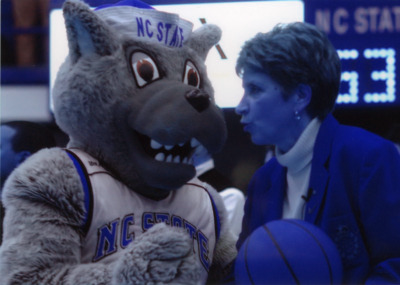

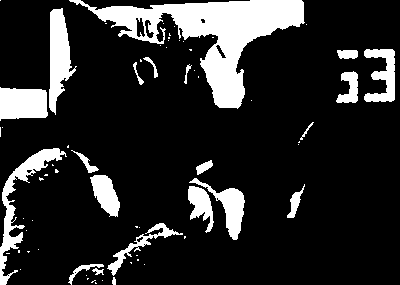

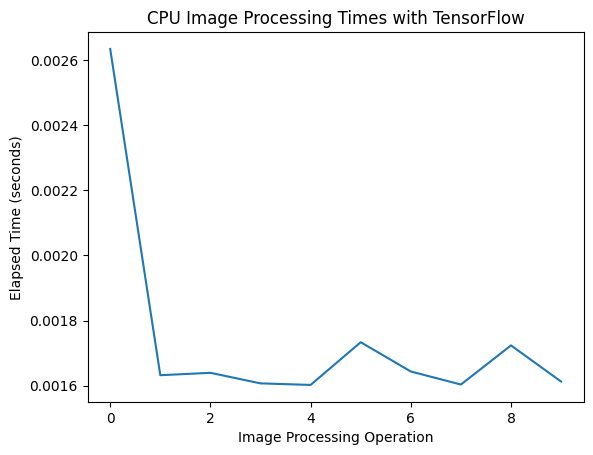

In [19]:
import cv2
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow # برای نمایش تصویر

# تصویر را بارگذاری می کنیم
img = io.imread('https://iiif.lib.ncsu.edu/iiif/0016007/full/400,/0/default.jpg')

# تصویر را به یک تانسور تنسورفلوو تبدیل می کنیم
img_tensor = tf.convert_to_tensor(img)

#زمان های اجرا را برای عملیات های مختلف پردازش تصویر ثبت می کنیم
execution_times = []
for i in range(10):

#زمان شروع را ذخیره می کنیم
    start_time = time.time()

    # پردازش تصویر را روی سی پی یو انجام می دهیم
    gray_tensor = tf.image.rgb_to_grayscale(img_tensor)
    thresholded_tensor = tf.where(gray_tensor > 127, 255, 0)

#زمان پایان را ذخیره می کنیم
    end_time = time.time()

#زمان سپری شده را محاسبه می کنیم
    elapsed_time = end_time - start_time
    execution_times.append(elapsed_time)

#تانسور آستانه ای را به حافظه سی پی یو برمی گردانیم
thresholded_tensor = thresholded_tensor.numpy()

# نمایش تصاویر اصلی و پردازش شده
cv2_imshow(img)
cv2_imshow(thresholded_tensor)
cv2.waitKey(0)
cv2.destroyAllWindows()

#زمان های اجرا را رسم می کنیم
plt.plot(range(10), execution_times)
plt.xlabel('Image Processing Operation')
plt.ylabel('Elapsed Time (seconds)')
plt.title('CPU Image Processing Times with TensorFlow')
plt.show()
